<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N¬∞05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gr√°ficos adecuados para distintos tipos de variables y preguntas de an√°lisis.



**Dataset**: 

Trabajaremos con el archivo `netflix_titles.csv`, que contiene informaci√≥n sobre los t√≠tulos disponibles en la plataforma Netflix hasta el a√±o 2021.

| Variable       | Clase     | Descripci√≥n                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador √∫nico del t√≠tulo en el cat√°logo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | T√≠tulo del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | Pa√≠s o pa√≠ses donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el t√≠tulo fue agregado al cat√°logo de Netflix.              |
| release_year   | entero    | A√±o de lanzamiento original del t√≠tulo.                                     |
| rating         | caracter  | Clasificaci√≥n por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duraci√≥n del contenido (minutos o n√∫mero de temporadas para series).        |
| listed_in      | caracter  | Categor√≠as o g√©neros en los que est√° clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
import pandas as pd

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/netflix_titles.csv')
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

## üìä Parte 1: Exploraci√≥n visual b√°sica

1. **Distribuci√≥n de tipos de contenido**

   * Realiza un gr√°fico de barras mostrando la cantidad de pel√≠culas vs series (`type`).
   * Pregunta gu√≠a: ¬øCu√°l es el tipo de contenido predominante en Netflix? ¬øQu√© implicancias podr√≠a tener para los usuarios?

2. **Histograma de a√±os de lanzamiento**

   * Muestra c√≥mo se distribuyen los t√≠tulos seg√∫n su `release_year`.
   * Pregunta gu√≠a: ¬øHay m√°s contenido reciente o antiguo? ¬øNotas alg√∫n patr√≥n en d√©cadas espec√≠ficas?

3. **Proporci√≥n de clasificaciones por edad (`rating`)**

   * Haz un gr√°fico circular o de barras.
   * Pregunta gu√≠a: ¬øQu√© clasificaci√≥n es m√°s com√∫n? ¬øCrees que Netflix est√° m√°s enfocado en p√∫blico adulto, familiar o infantil?



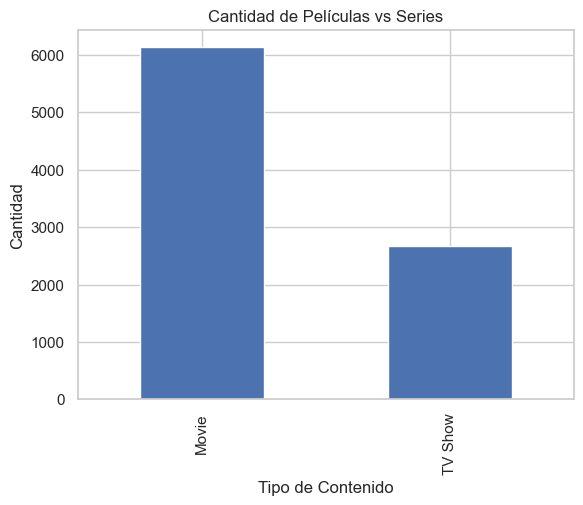

In [3]:
# Gr√°fico de barras
df['type'].value_counts().plot(kind='bar')

plt.title('Cantidad de Pel√≠culas vs Series')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Cantidad')
plt.show()

El tipo de contenido predominante en Netflix son las pel√≠culas, lo que implica que los usuarios tienen una mayor oferta de pel√≠culas para elegir.

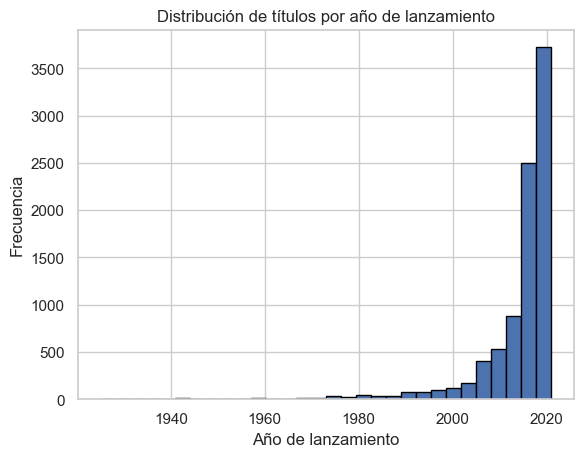

In [4]:
# Histograma
df['release_year'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribuci√≥n de t√≠tulos por a√±o de lanzamiento')
plt.xlabel('A√±o de lanzamiento')
plt.ylabel('Frecuencia')
plt.show()

La distribuci√≥n muestra que la mayor√≠a del contenido corresponde a a√±os recientes, especialmente desde el 2000 en adelante, con un crecimiento marcado a partir de la d√©cada del 2010. Los t√≠tulos anteriores a 1990 son escasos.

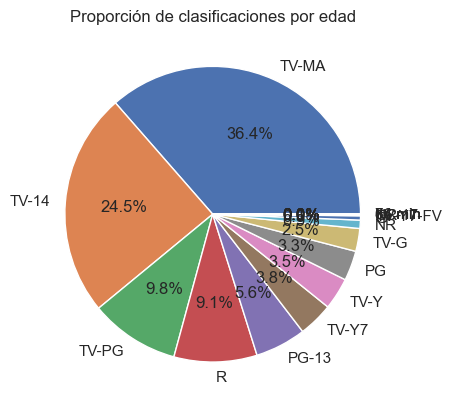

In [5]:
# Gr√°fico circular
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Proporci√≥n de clasificaciones por edad')
plt.ylabel('')
plt.show()


La clasificaci√≥n m√°s com√∫n es TV-MA. Esto indica que Netflix est√° principalmente enfocado en un p√∫blico adulto.



## üé® Parte 2: Tendencias y evoluci√≥n en el tiempo

4. **N√∫mero de t√≠tulos agregados por a√±o**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta gu√≠a: ¬øCu√°ndo creci√≥ m√°s el cat√°logo de Netflix? ¬øQu√© relaci√≥n podr√≠a tener con la expansi√≥n internacional de la plataforma?

5. **Heatmap de lanzamientos por a√±o y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta gu√≠a: ¬øHay meses con m√°s estrenos que otros? ¬øQu√© conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duraci√≥n de pel√≠culas por g√©nero**

   * Extrae la duraci√≥n en minutos y crea un boxplot agrupado por g√©nero principal.
   * Pregunta gu√≠a: ¬øQu√© g√©neros suelen durar m√°s? ¬øQu√© podr√≠as decir sobre la variabilidad dentro de un mismo g√©nero?


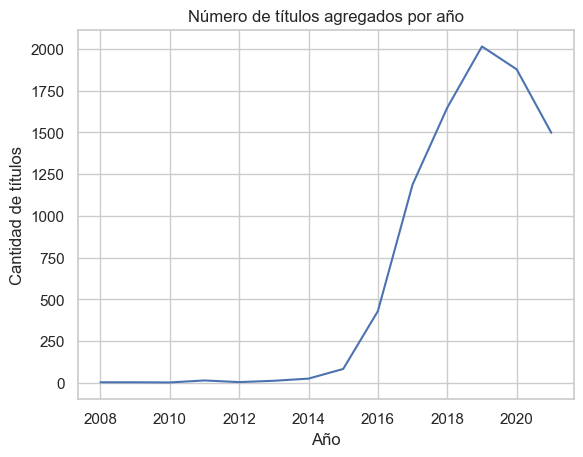

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['date_added'].dt.year.value_counts().sort_index().plot(kind='line')

plt.title('N√∫mero de t√≠tulos agregados por a√±o')
plt.xlabel('A√±o')
plt.ylabel('Cantidad de t√≠tulos')
plt.show()

El cat√°logo de Netflix creci√≥ m√°s entre 2016 y 2019. Aumento que coincide con la expansi√≥n internacional de la plataforma, cuando Netflix ampli√≥ su presencia a m√°s pa√≠ses.

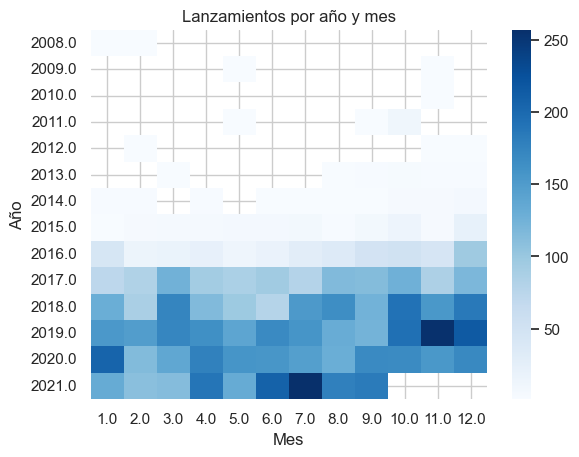

In [7]:
# Crear columnas de a√±o y mes
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Tabla din√°mica
heatmap_data = df.pivot_table(index='year_added', columns='month_added', values='show_id', aggfunc='count')

# Heatmap
sns.heatmap(heatmap_data, cmap='Blues')

plt.title('Lanzamientos por a√±o y mes')
plt.xlabel('Mes')
plt.ylabel('A√±o')
plt.show()

S√≠, se observan mayor cantidad de estrenos en los meses de julio y diciembre, lo que sugiere cierta estacionalidad asociada a vacaciones y fin de a√±o. Esto indica que Netflix concentra lanzamientos en periodos de mayor consumo.

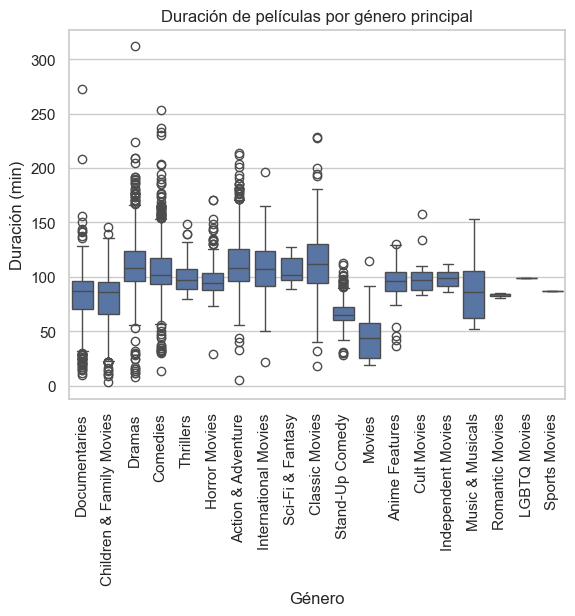

In [8]:
# Filtrar solo pel√≠culas y extraer duraci√≥n
movies = df[df['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.replace(' min','').astype(float)

# Boxplot
movies['main_genre'] = movies['listed_in'].str.split(',').str[0]
sns.boxplot(x='main_genre', y='duration_min', data=movies)

plt.title('Duraci√≥n de pel√≠culas por g√©nero principal')
plt.xlabel('G√©nero')
plt.ylabel('Duraci√≥n (min)')
plt.xticks(rotation=90)
plt.show()


Los g√©neros con mayor duraci√≥n son Classic Movies, Action & Adventure y Dramas. Se observa una alta variabilidad dentro de la mayor√≠a de los g√©neros, lo que indica que no existe una duraci√≥n est√°ndar fija



## üî• Parte 3: Comparaciones y relaciones

7. **Top 10 pa√≠ses con m√°s producciones**

   * Usa un gr√°fico de barras para mostrar los pa√≠ses m√°s frecuentes en la columna `country`.
   * Pregunta gu√≠a: ¬øQu√© pa√≠ses dominan el cat√°logo? ¬øSorprende la distribuci√≥n o es esperada?

8. **Pel√≠culas vs Series seg√∫n g√©nero**

   * Realiza un gr√°fico de barras apiladas para mostrar la cantidad de t√≠tulos por g√©nero, separando `Movie` y `TV Show`.
   * Pregunta gu√≠a: ¬øExisten g√©neros m√°s asociados a pel√≠culas o a series?

9. **Relaci√≥n entre duraci√≥n y a√±o de lanzamiento**

   * Haz un gr√°fico de dispersi√≥n (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta gu√≠a: ¬øHan cambiado los est√°ndares de duraci√≥n de las pel√≠culas con el tiempo? ¬øSe ven outliers interesantes?



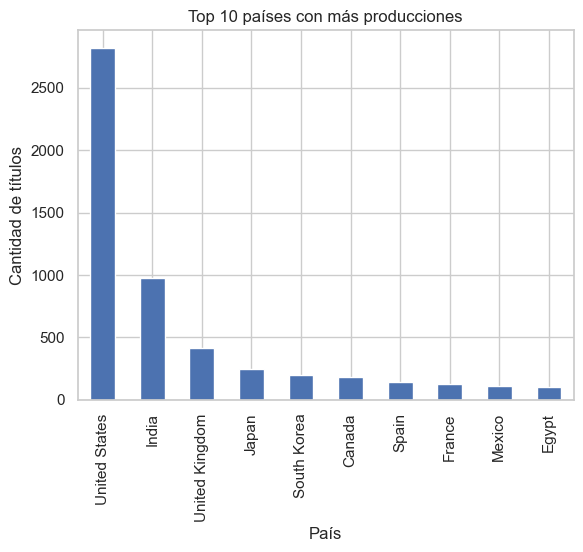

In [9]:
# Pa√≠ses con m√°s producciones
df['country'].value_counts().head(10).plot(kind='bar')

plt.title('Top 10 pa√≠ses con m√°s producciones')
plt.xlabel('Pa√≠s')
plt.ylabel('Cantidad de t√≠tulos')
plt.show()

El cat√°logo est√° dominado por Estados Unidos, seguido a distancia por India y el Reino Unido. La distribuci√≥n es esperada, ya que refleja el peso de estas industrias en la producci√≥n audiovisual global.

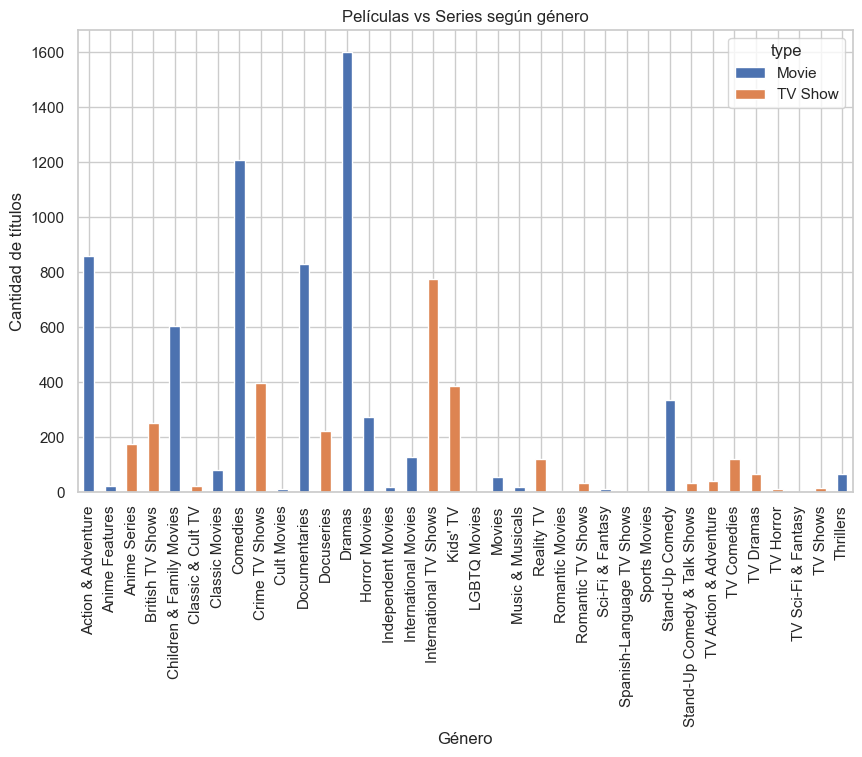

In [10]:
# Tomar el primer g√©nero de la lista
df['main_genre'] = df['listed_in'].str.split(',').str[0]

# Tabla de conteo
genre_type = df.groupby(['main_genre', 'type']).size().unstack(fill_value=0)

# Gr√°fico de barras apiladas
genre_type.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Pel√≠culas vs Series seg√∫n g√©nero')
plt.xlabel('G√©nero')
plt.ylabel('Cantidad de t√≠tulos')
plt.xticks(rotation=90)
plt.show()

S√≠. G√©neros como Dramas, Comedies y Documentaries se asocian principalmente a pel√≠culas, mientras que International TV Shows, Kids‚Äô TV y TV Dramas est√°n m√°s vinculados a series.

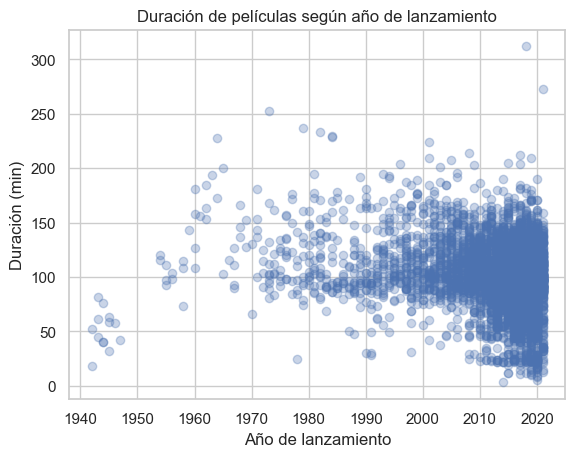

In [11]:
# Filtrar solo pel√≠culas y extraer duraci√≥n en minutos
movies = df[df['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.replace(' min','').astype(float)

# Gr√°fico de dispersi√≥n
plt.scatter(movies['release_year'], movies['duration_min'], alpha=0.3)

plt.title('Duraci√≥n de pel√≠culas seg√∫n a√±o de lanzamiento')
plt.xlabel('A√±o de lanzamiento')
plt.ylabel('Duraci√≥n (min)')
plt.show()

La duraci√≥n de las pel√≠culas se mantiene estable en el rango de 90 a 150 minutos a lo largo del tiempo. No obstante, se observan outliers con duraciones muy altas, especialmente en a√±os recientes, lo que corresponde a producciones especiales.

## ‚≠ê Desaf√≠o Final

* Encuentra las combinaciones m√°s frecuentes de **g√©nero + rating** y repres√©ntalas en un **heatmap o gr√°fico de burbujas**.
* Pregunta gu√≠a: ¬øQu√© g√©neros est√°n m√°s dirigidos a un p√∫blico adulto? ¬øY cu√°les a p√∫blico familiar o infantil?

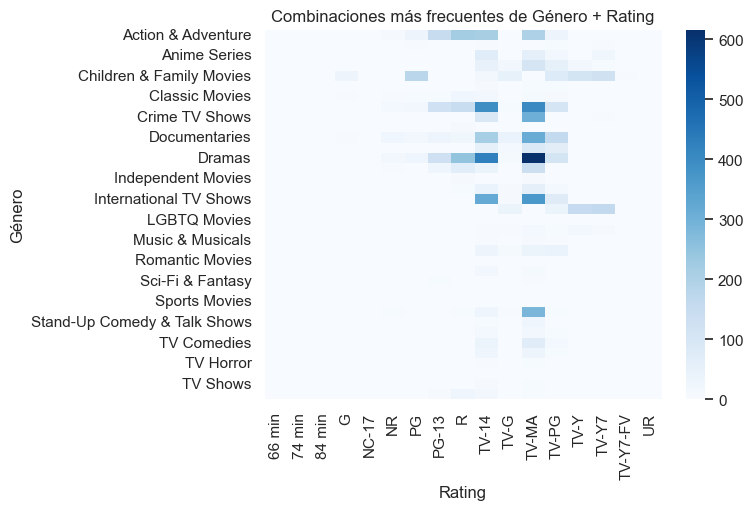

In [12]:
# Tomar g√©nero principal
df['main_genre'] = df['listed_in'].str.split(',').str[0]

# Tabla de frecuencia g√©nero + rating
combo = df.groupby(['main_genre', 'rating']).size().unstack(fill_value=0)

# Heatmap
sns.heatmap(combo, cmap="Blues")

plt.title('Combinaciones m√°s frecuentes de G√©nero + Rating')
plt.xlabel('Rating')
plt.ylabel('G√©nero')
plt.show()

Los g√©neros como Dramas, Documentaries e International TV Shows se concentran en clasificaciones TV-MA y TV-14, dirigidos principalmente a un p√∫blico adulto.
En cambio, g√©neros como Children & Family Movies y LGBTQ Movies se asocian m√°s a clasificaciones como TV-Y, TV-Y7 y PG, orientadas a un p√∫blico familiar e infantil.